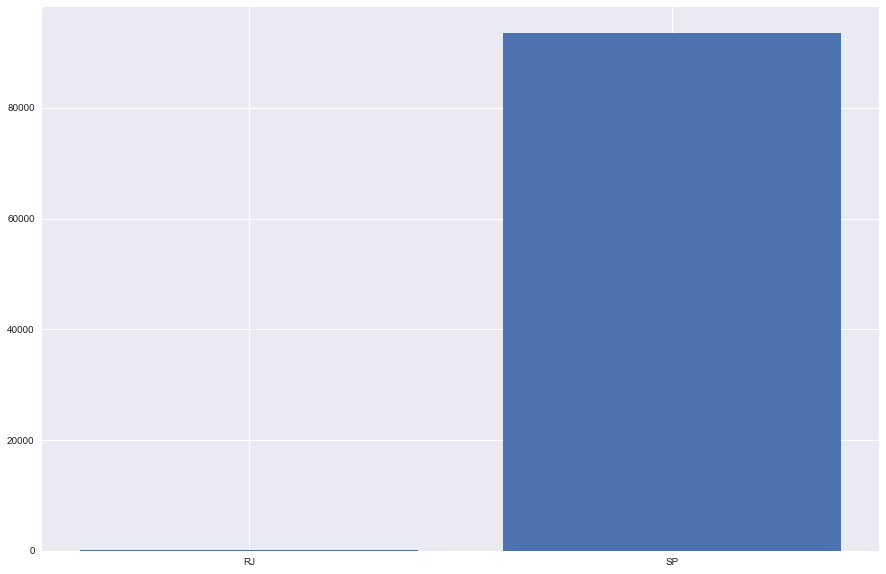

In [33]:
  
    import pandas as pd 
    import numpy as np
    import matplotlib.pyplot as plt
    from Peilun import clean_dataset
    df=clean_dataset()
    df = df.merge(pd.read_csv("datasets/product_category_name_translation.csv"),how="inner", on="product_category_name")
    customer_by_state = df[['customer_unique_id', 'customer_state']].groupby('customer_state').count().reset_index()
    customer_by_state = customer_by_state.sort_values(by=['customer_unique_id'])
   
    #no. of orders per country
    plt.style.use('seaborn')
    plt.figure(figsize=(15,10))
    plt.bar(customer_by_state['customer_state'], customer_by_state['customer_unique_id'])
    plt.show()


In [37]:
df["customer_state"].value_counts()

SP    93481
RJ      114
Name: customer_state, dtype: int64

In [29]:
customer_by_state['lat']=df['geolocation_lat']
customer_by_state['lon']=df['geolocation_lng']
customer_by_state.head()

,customer_state,customer_unique_id,lat,lon
0,RJ,114,-21.193728,-47.801502
1,SP,93481,-23.964711,-46.336101


In [30]:
def map():
    import folium
    # Make an empty map
    m = folium.Map(location=[-22.743975,-46.898709], tiles="OpenStreetMap", zoom_start=5)

    for i in range(0,len(customer_by_state)):
       folium.Circle(
          location=[customer_by_state.iloc[i]['lat'], customer_by_state.iloc[i]['lon']],
          popup=customer_by_state.iloc[i]['customer_state'],
          radius=float(customer_by_state.iloc[i]['customer_unique_id'])*100,
          color='crimson',
          fill=True,
          fill_color='crimson'
       ).add_to(m)
    display(m)
map()

In [31]:
from Jiaxin import findings

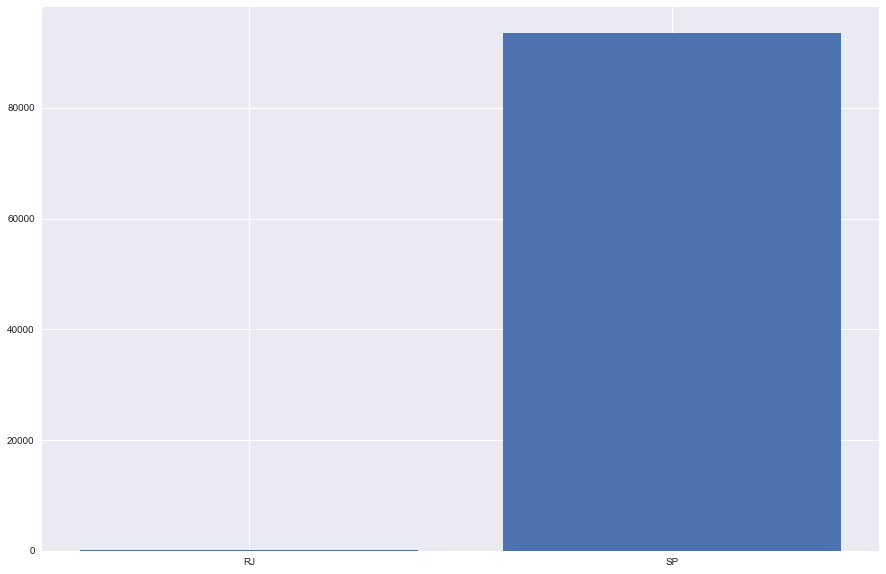

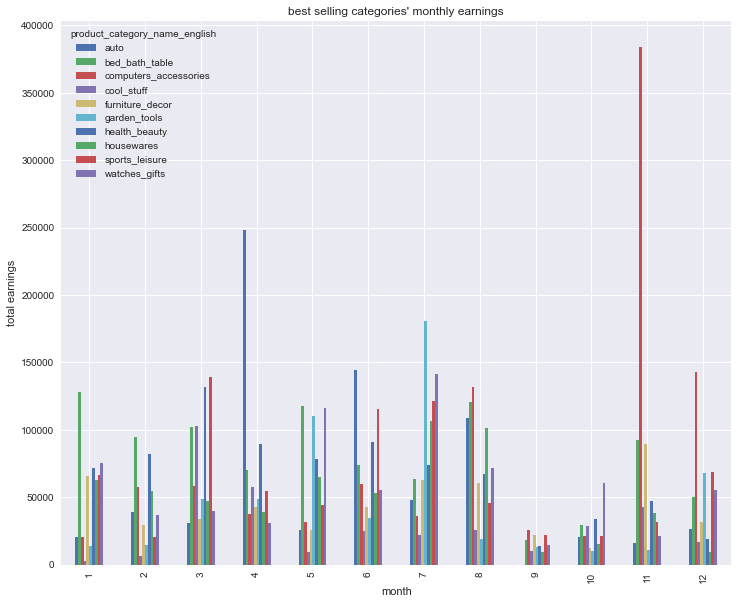

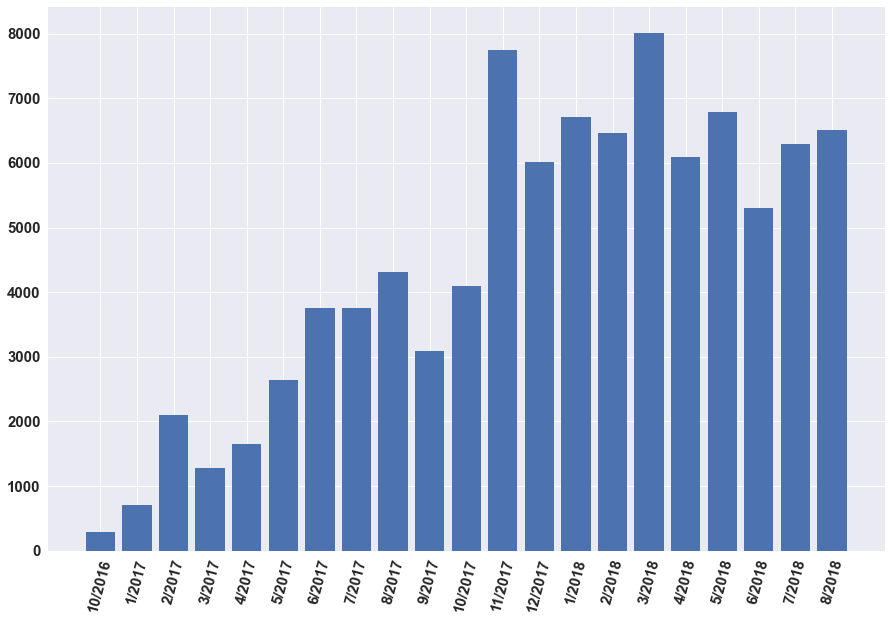

In [32]:
findings()